In [2]:
from import_library import *
# import pandas as pd

# Data Ingestion

In [3]:
file = 'Cafe_Data.xlsx'
data = pd.read_excel(file)
save_path = 'Results/'
data['date'] = pd.to_datetime(data['date'],format ='%d/%m/%y %H:%M:%S')
data

,date,Bill Number,Item Desc,Quantity,Rate,Tax,Discount,Total,Category
0,2010-04-01 13:15:11,G0470115,QUA MINERAL WATER(1000ML),1,50.00,11.88,0.00,61.88,BEVERAGE
1,2010-04-01 13:15:11,G0470115,MONSOON MALABAR (AULAIT),1,100.00,23.75,0.00,123.75,BEVERAGE
2,2010-04-01 13:17:35,G0470116,MASALA CHAI CUTTING,1,40.00,9.50,0.00,49.50,BEVERAGE
3,2010-04-01 13:19:55,G0470117,QUA MINERAL WATER(1000ML),1,50.00,11.88,0.00,61.88,BEVERAGE
4,2010-04-01 01:20:18,G0470283,MOROCCAN MINT TEA,1,45.00,10.69,0.00,55.69,BEVERAGE
...,...,...,...,...,...,...,...,...,...
145825,2010-05-22 21:43:55,N0028716,ZINZI WHITE (GLS),2,150.00,78.00,0.00,378.00,LIQUOR
145826,2010-04-27 20:52:11,N0028343,ZINZI WHITE (GLS),2,150.00,78.00,0.00,378.00,LIQUOR
145827,2010-05-28 01:03:37,N0028835,ZINZI WHITE (GLS),3,150.00,117.00,0.00,567.00,LIQUOR
145828,2010-04-30 23:44:37,N0028399,ZINZI WHITE (GLS),1,150.00,39.00,0.00,189.00,LIQUOR


# Function

In [76]:
# Pie Chart
# Function for Data Visualization
def PieChart(data, title,labels=None,legendTitile=None,colors=None,save=False ):
    """
    Plot pie chart
    ----------
    Parameters (Attributes)    
    data : string
        relative path for the images files
    title_chart : string
        the title of the chart
    labels : list, default: None
        labels of the chart
    legendTitile: list ,default: None
        legends of the chart
    save: bool ,default = False
    ------
    Returns:    
    The plot
    ------
    Example:
    apr_2010_sum = apr_2010['Total'].sum()
    pieChartTitle = f'The Percentage of Categories in The April Sale ({apr_2010_sum}) 2010'
    legendTitile = 'Categories'
    colors = ['orange', 'green', 'red', 'pink', 'brown','cyan',blue]
    PieChart(percentage_cate_value,pieChartTitle,labels=category_list,legendTitile=legendTitile,colors)
    """
    def my_autopct1(x):
        '''
        invisible for partions less than 5%
        return (f'{x:.1f}% ({np.sum(data)*x/100:.0f})') if x > 5 else ''#\n
        '''    
        return (f'{x:.1f}% \n ({np.sum(data)*x/100:.0f})') if x > 5 else '' #\n

    plt.figure(figsize=(10,5))
    plt.pie(data, 
            autopct=my_autopct1, 
           colors=colors
           )    
    plt.title(title)
    plt.legend(labels,title= legendTitile,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))
    if save:
        if not os.path.exists(f'{save_path}/Images/'):
            os.makedirs( f'{save_path}/Images/')        
        plt.savefig(f'{save_path}/Images/{title}.png')
    plt.show()
    return 

# Data Analysis

In [5]:
data.dtypes

date            datetime64[ns]
Bill Number             object
Item Desc               object
Quantity                 int64
Rate                   float64
Tax                    float64
Discount               float64
Total                  float64
Category                object
dtype: object

In [6]:
data.isnull().sum()

date            0
Bill Number     0
Item Desc       0
Quantity        0
Rate            0
Tax             0
Discount        0
Total           0
Category        0
dtype: int64

In [7]:
data['Quantity'].value_counts()

Quantity
1     132355
2      11015
3       1596
4        512
5        159
6         93
7         27
9         24
8         22
10         9
13         4
11         4
12         3
30         1
18         1
14         1
23         1
16         1
26         1
15         1
Name: count, dtype: int64

In [8]:
data['Category'].value_counts()

Category
FOOD                57023
BEVERAGE            43573
TOBACCO             36496
LIQUOR               6200
MISC                 1187
WINES                 809
MERCHANDISE           487
LIQUOR & TOBACCO       54
LIQUOR                  1
Name: count, dtype: int64

# Feature Engineering

In [9]:
data['year'] = data['date'].dt.strftime('%Y')
data['month'] = data['date'].dt.strftime('%m')
data['day'] = data['date'].dt.strftime('%d')
data

,date,Bill Number,Item Desc,Quantity,Rate,Tax,Discount,Total,Category,year,month,day
0,2010-04-01 13:15:11,G0470115,QUA MINERAL WATER(1000ML),1,50.00,11.88,0.00,61.88,BEVERAGE,2010,04,01
1,2010-04-01 13:15:11,G0470115,MONSOON MALABAR (AULAIT),1,100.00,23.75,0.00,123.75,BEVERAGE,2010,04,01
2,2010-04-01 13:17:35,G0470116,MASALA CHAI CUTTING,1,40.00,9.50,0.00,49.50,BEVERAGE,2010,04,01
3,2010-04-01 13:19:55,G0470117,QUA MINERAL WATER(1000ML),1,50.00,11.88,0.00,61.88,BEVERAGE,2010,04,01
4,2010-04-01 01:20:18,G0470283,MOROCCAN MINT TEA,1,45.00,10.69,0.00,55.69,BEVERAGE,2010,04,01
...,...,...,...,...,...,...,...,...,...,...,...,...
145825,2010-05-22 21:43:55,N0028716,ZINZI WHITE (GLS),2,150.00,78.00,0.00,378.00,LIQUOR,2010,05,22
145826,2010-04-27 20:52:11,N0028343,ZINZI WHITE (GLS),2,150.00,78.00,0.00,378.00,LIQUOR,2010,04,27
145827,2010-05-28 01:03:37,N0028835,ZINZI WHITE (GLS),3,150.00,117.00,0.00,567.00,LIQUOR,2010,05,28
145828,2010-04-30 23:44:37,N0028399,ZINZI WHITE (GLS),1,150.00,39.00,0.00,189.00,LIQUOR,2010,04,30


In [10]:
data[data['year']=='2010'].value_counts()

date                 Bill Number   Item Desc                             Quantity  Rate    Tax     Discount  Total    Category     year  month  day
2010-08-25 20:54:27  G0494990      GREAT LAKES T-SHIRTS                  1         332.00  16.60   0.00      348.60   MERCHANDISE  2010  08     25     4
2010-04-17 17:15:39  G0472765      PHILLYCREAM CHEESE &CHILLY PAN        1         105.00  24.94   0.00      129.94   FOOD         2010  04     17     3
2010-11-28 21:58:49  G0511347      COTTAGE CHEESE PANINI                 1         105.00  24.94   0.00      129.94   FOOD         2010  11     28     3
2010-05-01 19:09:12  G0475040      B.M.T. PANINI                         1         105.00  24.94   0.00      129.94   FOOD         2010  05     01     3
2010-04-03 21:12:56  G0470591      B.M.T. PANINI                         1         105.00  24.94   0.00      129.94   FOOD         2010  04     03     3
                                                                                       

# Data Aggregation

In [11]:
year_group = data.groupby('year')
year_2010 = year_group.get_group('2010') #4->12
month_2010_group = year_2010.groupby('month')

In [12]:
year_2010['Total'].sum()

24054138.14

## Sale Analysis

In [81]:
def month_analysis(data,year,month,save=False):
    '''    
    Sale Month Analyis
    ----------
    Parameters (Attributes)    
    data : df.DataFrame
        Dataset
    year : string
        year choice
    month : string
        month choice
    save: bool ,default = False
    ------
    Returns:    
    The saved data
    ------
    Example:    
    year_choice = '2010'
    month_choice = '04'    
    month_analysis(data,year_choice,month_choice,save=True)
    '''
    # Data Aggregation 
    year_group = data.groupby('year')
    year_2010 = year_group.get_group(year) #4->12
    month_2010_group = year_2010.groupby('month')
    apr_2010 = month_2010_group.get_group(month)

    # category_list = apr_2010['Category'].unique().tolist()
    category_list = ['BEVERAGE','FOOD','LIQUOR','MERCHANDISE','TOBACCO','WINES','MISC']
    apr_2010_cat_group = apr_2010.groupby('Category')
    cat_varibles = []
    for cat in category_list:
        cat_varibles.append(apr_2010_cat_group.get_group(cat))

    percentage_cate_value = []
    # Calculate Percentage
    for idx in range(len(category_list)):
        percentage_cate_value.append(cat_varibles[idx]['Total'].sum())

    apr_2010_sum = apr_2010['Total'].sum()
    proportion_income_out_of_year = apr_2010['Total'].sum()*100 / year_2010['Total'].sum()
    pieChartTitle = f'The Percentage of Categories in {month}-{year} Sale ({apr_2010_sum:.2f}-{proportion_income_out_of_year:.2f}%)'
    legendTitile = 'Categories'
    colors = ['orange', 'green', 'red', 'pink', 'cyan','brown','blue']
    PieChart(percentage_cate_value,pieChartTitle,labels=category_list,legendTitile=legendTitile,colors=colors,save=save)

    # Export the most selling product in April 2010 - # Need the threshold (Confirm from customers)
    item_lists = apr_2010['Item Desc'].unique().tolist()
    apr_2010_item_group = apr_2010.groupby('Item Desc')
    total_item_values = []
    categories = []
    proportions = []
    for item in item_lists:
        sum = apr_2010_item_group.get_group(item)['Total'].sum()
        total_item_values.append(sum)
        categories.append(apr_2010_item_group.get_group(item)['Category'].unique()[0])
        proportions.append(sum*100/apr_2010_sum)
    data_dict = {
        'items' : item_lists,
        'total_sale': total_item_values,
        'Proportions': proportions,
        'month': [f'{month}' for i in range(len(total_item_values))],
        'Categories': categories,
        
    }
    df = pd.DataFrame(data_dict)
    df.sort_values(by=['total_sale'],ascending=False, inplace=True)
    if save:
        if not os.path.exists(f'{save_path}/DataFrame/'):
            os.makedirs( f'{save_path}/DataFrame/')                
        df.to_csv(f'{save_path}/DataFrame/{month}-{year}.csv')
    print('Done Analysis')
    return df

def best_sold_items(data,year_choice,month_choice,sale_threshold=20000,save=False):
    '''
    Best sold Items and Months Sale Analyis
    ----------
    Parameters (Attributes)    
    data : df.DataFrame
        Dataset
    year : string
        year choice
    month : string
        month choice
    sale_threshold: int or float, default = 20000
        sale threshold to be considered as best sellers
    save: bool ,default = False
    ------
    Returns:    
    The saved data
    ------
    Example:  
    month_choices = ['04', '05', '06', '07', '08', '09', '10', '11', '12']
    year_choice = '2010'
    sale_threshold = 20000 # unit
    best_sold_items(data,year_choice,month_choice,sale_threshold,save=True)
    '''
    df_result = pd.DataFrame()
    for month_choice in month_choices:
        df_analysis = month_analysis(data,year_choice,month_choice,save=save)
        
        df_temp = df_analysis[df_analysis['total_sale'] > sale_threshold]
        df_result = pd.concat([df_result,df_temp])
        
    df_result.sort_values(by=['items'],inplace=True)
    title = f'Best sold items in {year_choice}'
    df_result.to_csv(f'{save_path}/DataFrame/{title}.csv')
    best_sold_items = list(df_result['items'].unique())
    
    if save:
        # Save dataframe
        if not os.path.exists(f'{save_path}/DataFrame/'):
            os.makedirs( f'{save_path}/DataFrame/')                
        df_result.to_csv(f'{save_path}/DataFrame/{title}.csv')
        # Save best sold items
        with open(f'{save_path}/DataFrame/{title}', 'w') as fp:
            fp.write("\n".join(str(item) for item in best_sold_items))

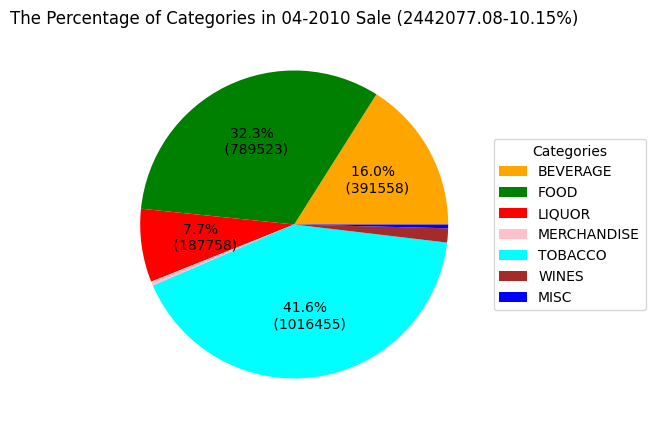

Done Analysis


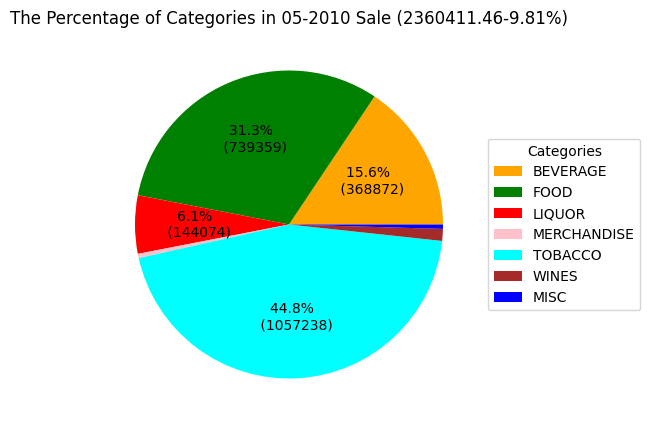

Done Analysis


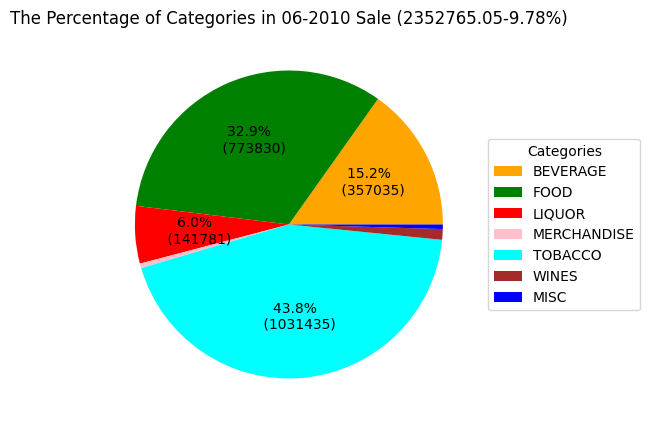

Done Analysis


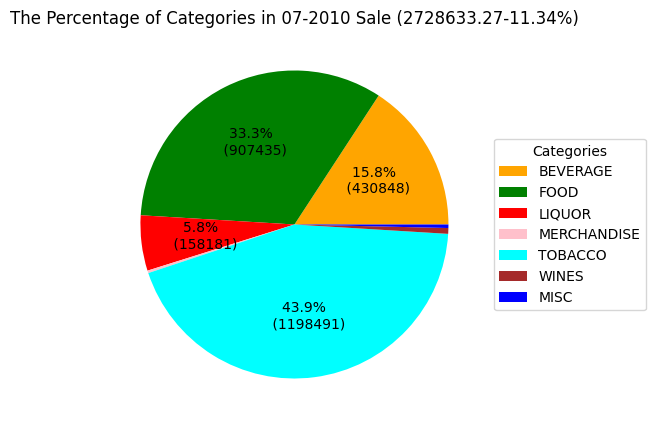

Done Analysis


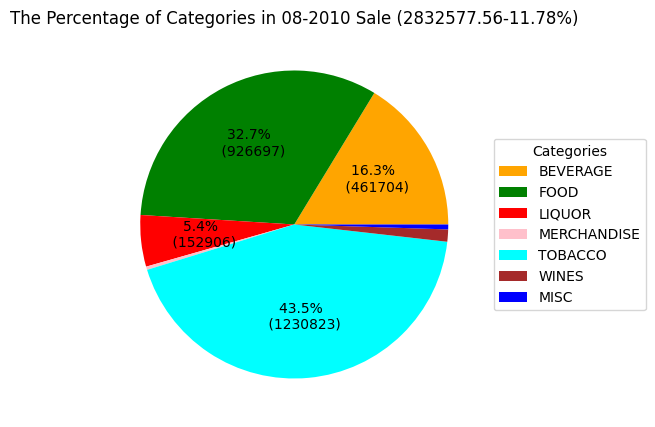

Done Analysis


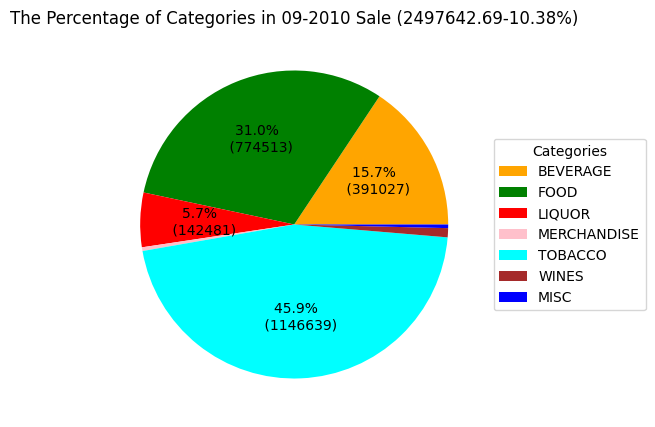

Done Analysis


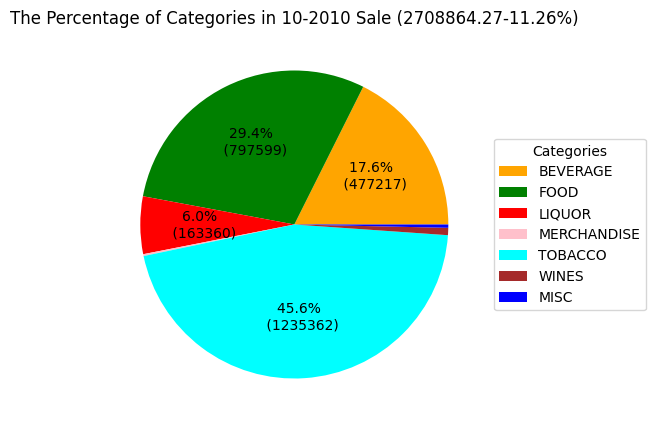

Done Analysis


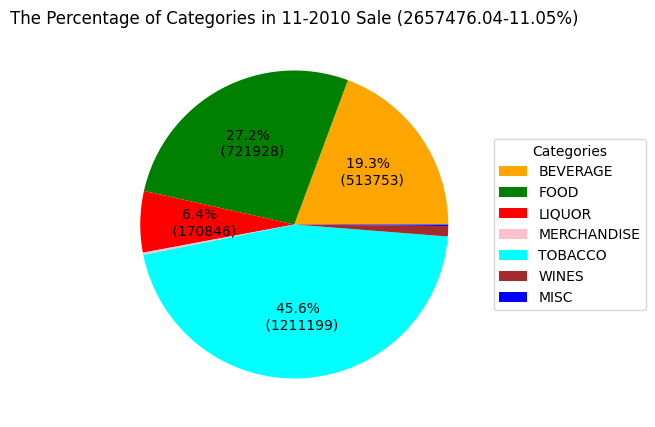

Done Analysis


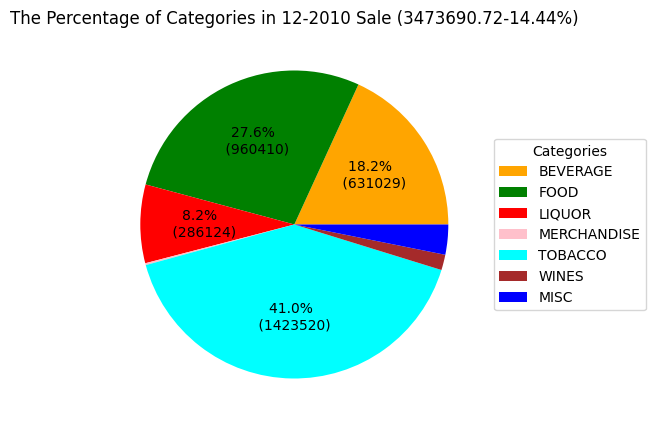

Done Analysis


In [82]:
month_choices = ['04', '05', '06', '07', '08', '09', '10', '11', '12']
year_choice = '2010'
sale_threshold = 20000 # unit
#Best sold Items and Months Sale Analyis
best_sold_items(data,year_choice,month_choice,sale_threshold,save=True)